In [15]:
import pandas as pd


movies_df = pd.read_csv(r"C:\Bakalaurs_praktiskais\Bakalaura-darbs\movies.csv")
ratings_df = pd.read_csv(r"C:\Bakalaurs_praktiskais\Bakalaura-darbs\ratings.csv")   

# Apvieno filmu datus ar vērtējumu datime
merged_df = pd.merge(ratings_df, movies_df, left_on='movieId', right_on='movieId')

# Sagrupē pēc filmas nosaukuma un vidējā vērtējuma
movie_stats = merged_df.groupby('title')['rating'].agg(['mean', 'count']).reset_index()
rating_counts = merged_df.groupby('title').size().reset_index(name='rating_count')

# Iegūst filmas ar lielāko vērtējumu skaitu
top_rated_movies_df = rating_counts.sort_values(by='rating_count', ascending=False).head(10)
print(top_rated_movies_df)



                                          title  rating_count
3158                        Forrest Gump (1994)           329
7593           Shawshank Redemption, The (1994)           317
6865                        Pulp Fiction (1994)           307
7680           Silence of the Lambs, The (1991)           279
5512                         Matrix, The (1999)           278
8001  Star Wars: Episode IV - A New Hope (1977)           251
4662                       Jurassic Park (1993)           238
1337                          Braveheart (1995)           237
8363          Terminator 2: Judgment Day (1991)           224
7421                    Schindler's List (1993)           220


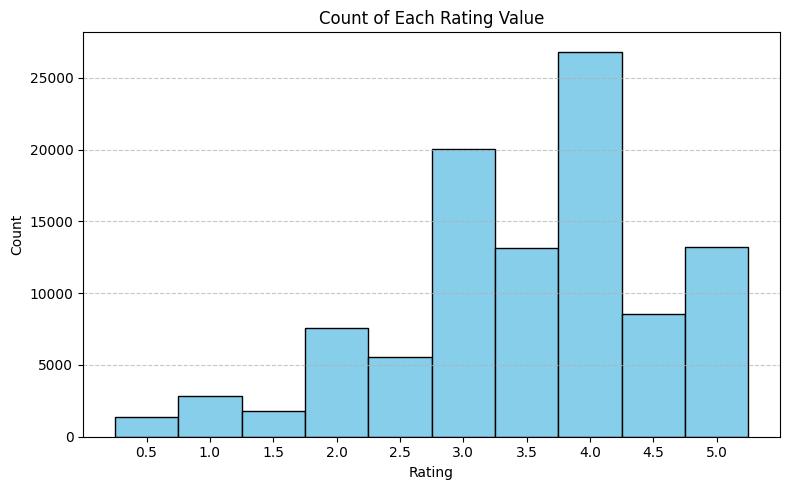

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


ratings_df = pd.read_csv(r"C:\Bakalaurs_praktiskais\Bakalaura-darbs\ratings.csv")

# Saskaita katras vērtības skaitu
rating_counts = ratings_df['rating'].value_counts().sort_index()

# Izveido diagrammu
plt.figure(figsize=(8, 5))
plt.bar(rating_counts.index, rating_counts.values, width=0.5, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of Each Rating Value')
plt.xticks(rating_counts.index) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

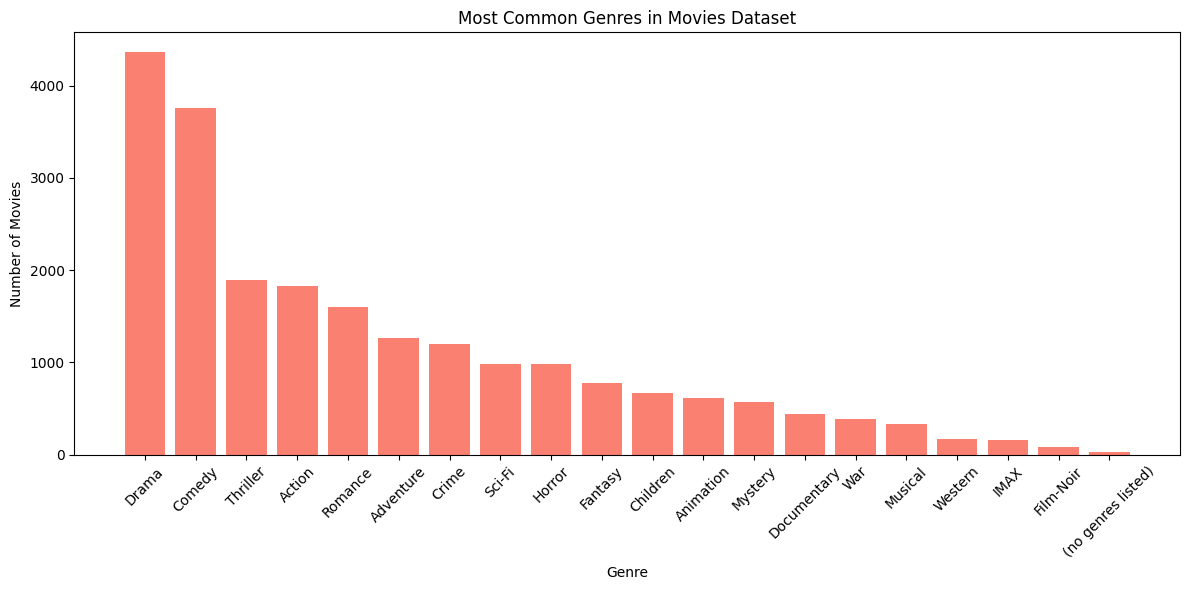

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


movies_df = pd.read_csv(r"C:\Bakalaurs_praktiskais\Bakalaura-darbs\movies.csv")

# Sadala žanrus starp '|' simbola
movies_df['genres'] = movies_df['genres'].str.split('|')
exploded_genres = movies_df.explode('genres')

# Izskaita žanra biežumu
genre_frequency = exploded_genres['genres'].value_counts().reset_index()
genre_frequency.columns = ['Genre', 'Count']

# Uzzīmē diagrammu
plt.figure(figsize=(12, 6))
plt.bar(genre_frequency['Genre'], genre_frequency['Count'], color='salmon')
plt.title('Most Common Genres in Movies Dataset')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()